# House Price Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

First, we have to load the dataset.I am loading the dataset using pandas and checking the basic info and then using the describe  function from pandas to generate a summary statistics of the dataset.Then, I used the transpose function to transpose the index and columns of our dataset for our convenience.

In [2]:
df = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price prediction\House price prediction\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Getting few more insights from the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [6]:
#see all rows
pd.set_option("max_rows", None)

In [7]:
df.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# Data Cleaning

First we are checking the percentage of null value of each column.And in the process we dropped the columns having more than 80% null values.

In [8]:
round(df.isnull().sum()/len(df.index) * 100, 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

Considering 80% as the cut-off for our analysis, we will drop all the columns that have a missing percentage of above 80 ,which are :

PoolQC, MiscFeature, Alley, Fence      

In [9]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

Imputing the other columns with high percentage of null values - FireplaceQu, LotFrontage,  missing values with some relevant values.First we will check the frequency of specific values and then use fillna function to replace the missing values with a releveant value.

In [10]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Replacing NA values in FireplaceQU with 'No Fireplace'.

In [11]:
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [12]:
df['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [13]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Replacing NA values in LotFrontage with 0.

In [14]:
df['LotFrontage'].fillna(0, inplace=True)

In [15]:
df['LotFrontage'].isnull().sum()

0

Imputing the NA's for the Garage Related columns - GarageType, GarageFinish, GarageQual, GarageCond, No Garage.

In [16]:
df['GarageType'].fillna('No Garage', inplace=True) 
df['GarageFinish'].fillna('No Garage', inplace=True) 
df['GarageQual'].fillna('No Garage', inplace=True) 
df['GarageCond'].fillna('No Garage', inplace=True)

In [17]:
#Let's take a look at missing percentage in each column
round(df.isnull().sum()/len(df.index) * 100, 2).sort_values(ascending=False)

GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtQual         2.53
BsmtCond         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
BedroomAbvGr     0.00
Fireplaces       0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
Functional       0.00
Id               0.00
2ndFlrSF         0.00
GarageType       0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
GarageCars       0.00
GarageFinish     0.00
FireplaceQu      0.00
Heating          0.00
1stFlrSF         0.00
LotConfig        0.00
HouseStyle

In [18]:
#Imputing the Masonary Vaneer related columns - MasVnrArea, MasVnrType
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
df['MasVnrType'].isnull().sum()

8

In [20]:
df['MasVnrType'].fillna('None',inplace=True)

In [21]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [22]:
df['MasVnrArea'].fillna(0, inplace=True)

Analysing the basement related attributes-BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 -
in order to have a better understanding of what to impute them with.

In [23]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [24]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [25]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [26]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [27]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
# As these are all categorical columns, we will impute with the corresponding Mode values
df['BsmtQual'].fillna('TA', inplace=True)
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('Unf', inplace=True)
df['BsmtFinType2'].fillna('Unf', inplace=True)

In [29]:
round(df.isnull().sum()/len(df.index) * 100, 2).sort_values(ascending=False)

GarageYrBlt      5.55
Electrical       0.07
HalfBath         0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
FullBath         0.00
HeatingQC        0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
GarageType       0.00
Id               0.00
GarageFinish     0.00
GarageCars       0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
CentralAir       0.00
Heating          0.00
MSSubClass       0.00
LandSlope        0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2

In [30]:
df.YearBuilt.max()

2010

In [31]:
#Let us now take a look at the year related attributes- YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Converting the Years column to Age in current Year.

In [32]:
df['YearBuilt'] = 2022 - df['YearBuilt']
df['YearRemodAdd'] = 2022 - df['YearRemodAdd']
df['GarageYrBlt'] = 2022 - df['GarageYrBlt']
df['YrSold'] = 2022 - df['YrSold']

In [33]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,19,19,19.0,14
1,46,46,46.0,15
2,21,20,21.0,14
3,107,52,24.0,16
4,22,22,22.0,14


Imputing GarageYrBlt with -1, as it means those houses don't have any garage.

In [34]:
df['GarageYrBlt'].fillna(-1, inplace=True)

In [35]:
#Lets tale a look at the Electrical column
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
#Imputing it with the mode value
df['Electrical'].fillna('SBrkr', inplace=True)

 Dropping additional columns,
 Since id column is a unique key and hence can be dropped.

In [37]:
df = df.drop('Id', axis=1)

In [38]:
corr = df.corr()
print(corr)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.215023 -0.139781     0.032628    -0.059316   
LotFrontage     -0.215023     1.000000  0.100739     0.176561    -0.053457   
LotArea         -0.139781     0.100739  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.176561  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053457 -0.005636    -0.091932     1.000000   
YearBuilt       -0.027850    -0.036853 -0.014228    -0.572323     0.375983   
YearRemodAdd    -0.040581    -0.078686 -0.013788    -0.550684    -0.073741   
MasVnrArea       0.023573     0.105010  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.076670  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649    -0.009312  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.160829 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.238274  0.260833     0.537808   

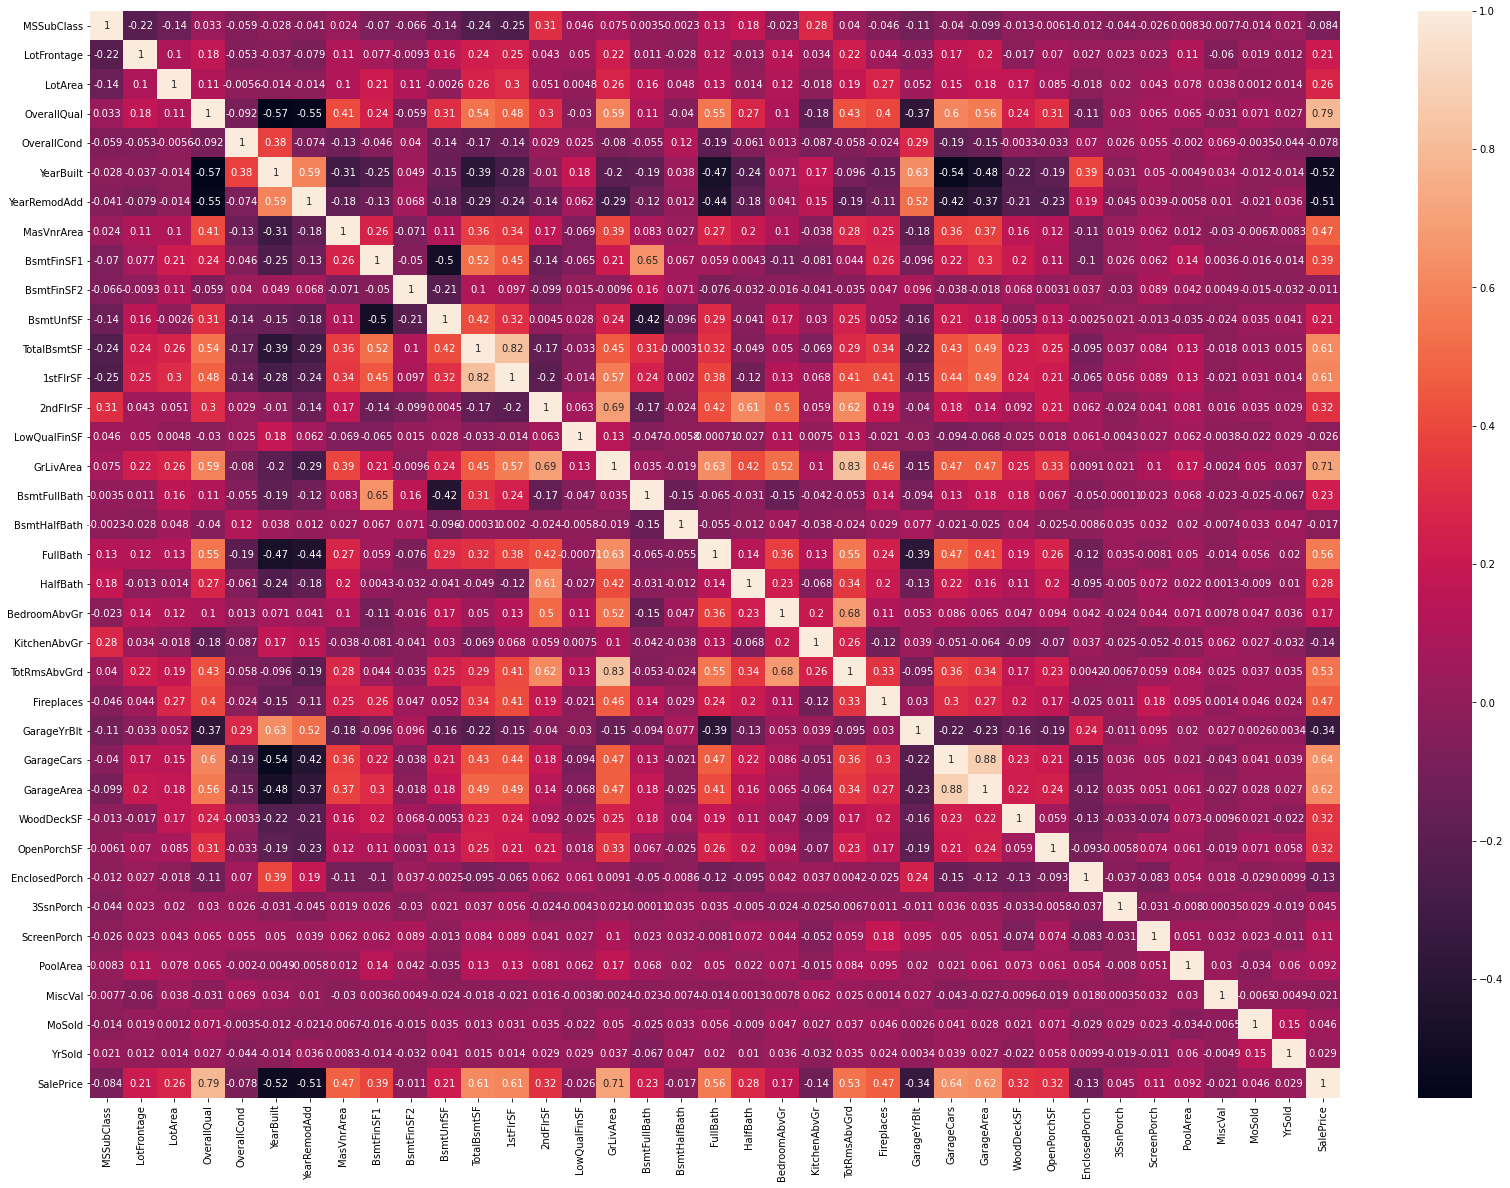

In [39]:
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()

Droppnig some highly correlated columns ,
From above we can see clearly that the columns YearBuilt and GarageYrBlt are highly correlated. So we can drop one of them.

In [40]:
df = df.drop('GarageYrBlt', axis=1)

In [41]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [42]:
df.shape

(1460, 75)

Converting some of the columns that have been marked as Integer to Object types, as they are more like categorical values
 MSSubClass, OverallQual, OverallCond

In [43]:

df[['MSSubClass', 'OverallQual', 'OverallCond' ]].head()


,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5
3,70,7,5
4,60,8,5


In [44]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [45]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [46]:
df.shape

(1460, 75)

### Outlier Treatment

We will now look for outliers in the integer type columns and remove them from our dataset.

In [47]:
list(df.dtypes[df.dtypes !='object'].index)

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [48]:
df[list(df.dtypes[df.dtypes!=object].index)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,50.732192,30.202904,12.0,22.00,49.0,68.00,150.0
YearRemodAdd,1460.0,37.134247,20.645407,12.0,18.00,28.0,55.00,72.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


From above list we can clearly see columns such as - LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF
 GrLivArea, MiscVal, have clear outliers. We will try to remove them using below function.

In [49]:

outlier_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'MiscVal']

def removeOutliers(x):    
    for col in outlier_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = removeOutliers(df)

In [50]:
df.shape

(1447, 75)

In [51]:
df[list(df.dtypes[df.dtypes !='object'].index)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1447.0,57.578438,33.866213,0.0,43.0,63.0,79.0,313.0
LotArea,1447.0,10048.089841,5475.696214,1300.0,7517.5,9453.0,11519.0,70761.0
YearBuilt,1447.0,50.682101,30.267363,12.0,21.5,49.0,68.0,150.0
YearRemodAdd,1447.0,37.175536,20.654796,12.0,18.0,28.0,55.0,72.0
MasVnrArea,1447.0,102.417415,179.816754,0.0,0.0,0.0,163.5,1600.0
BsmtFinSF1,1447.0,437.871458,434.546284,0.0,0.0,380.0,707.0,2260.0
BsmtFinSF2,1447.0,45.704907,160.218732,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1447.0,568.870767,442.736610,0.0,224.5,481.0,810.5,2336.0
TotalBsmtSF,1447.0,1052.447132,417.147466,0.0,795.0,990.0,1289.5,3206.0
1stFlrSF,1447.0,1158.889426,374.545119,334.0,882.0,1086.0,1386.0,3228.0


# Data Exploration

### Which is the most common house (Bedroom wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

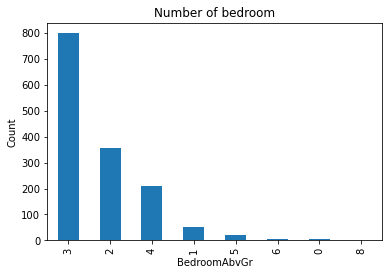

In [52]:
df['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('Number of bedroom')
plt.xlabel('BedroomAbvGr')
plt.ylabel('Count')
sns.despine

As we can see from the visualization that 3 bedroom houses are sold more than others.So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.But at what location ?

### Visualizing the location of the houses based on location

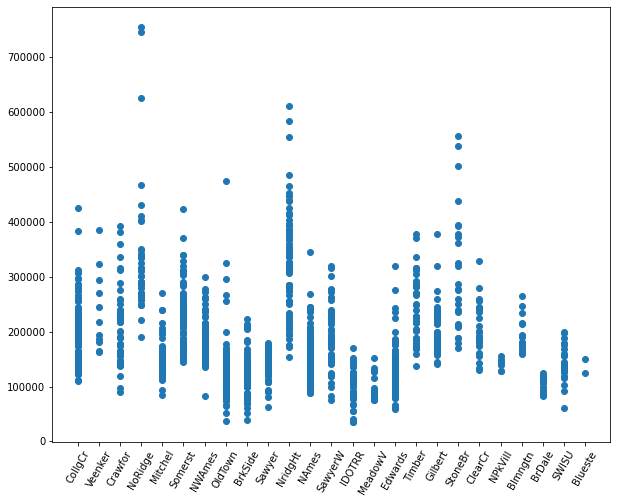

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(df['Neighborhood'],df['SalePrice'])
plt.xticks(rotation=60)
plt.show()

This is a scatter plot which shows us the relation between two variables.As we can see from the above plot that location ofv a place greatly influences the sale price of a house with Northridge recording the highest sale price,with northridge heights recording the second highest sale price range followed by StoneBrook.

### How common factors are affecting the price of the houses ?

In the below lines we will try to find the realtion between Masonry Veneer Area and sales price,Total Square feet of basement area and sales price,First floor square feet and sales price,Garage area and sales price,Above ground living area square feet and sales price,Wood deck area in square feet and sales price using scatter plots.

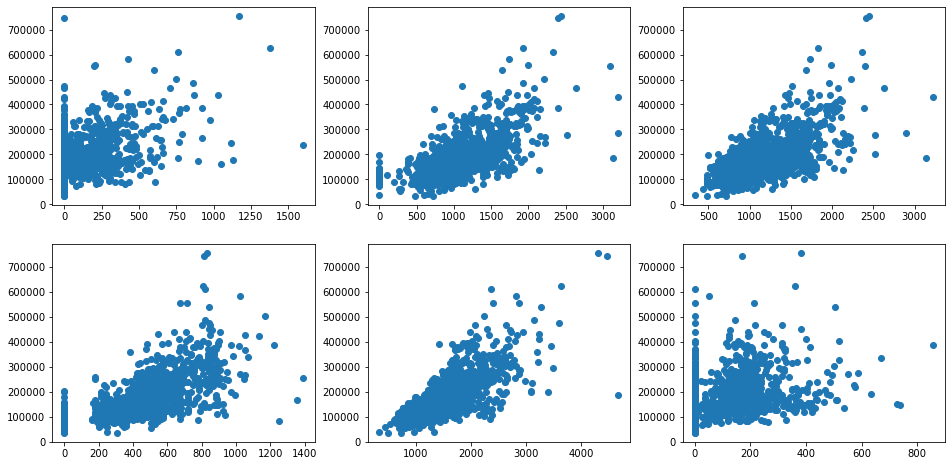

In [54]:

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df['SalePrice'])

The plot that we used above is called scatter plot , scatter plot helps us to see how our data points are scattered and are usually used for two variables. 
Here,from the above scatter plots we can see that the factors have positive correlation with sales price except wood deck surface area,while Total Basement Square feet,First floor square feet and above grade living area having higher positive correlation than the rest of the factors.Some of the specific observations:-

1.In the first plot we can see that the house with high masonry veneer area was sold for a great price but we also observed that   houses with very low masonry veneer being sold at a greater price than the other houses with high masonry veneer area.Maybe     there are some other factors affecting the price.

2.In the second plot we see that houses with moderate basement area has a high sale price.

3.In the third plot we see that the houses with more first floor surface area got sold at a higher price compared to others.But there are also some houses which got sold at a low price inspite of having more first floor surface area than others.

4.In the fourth plot we see that the houses with a garage surface area between 800-1000 feet has the highest sale price recorded.

5.in the 5th plot,we see that higher the above grade living area,higher the sale price inspite of having  one exception which may be influenced by some other factors.

6.In the 6th plot,we see that the sale price decreases gradually as the wood deck surface area increases.

### Analysing some of the other attributes like - TotRmsAbvGrd(Total rooms above grade), YearBuilt(which is the Age of house) V/S sales price.

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

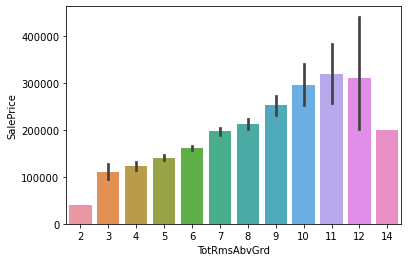

In [55]:
sns.barplot(x= 'TotRmsAbvGrd', y = 'SalePrice', data = df, estimator = np.mean)

As we can see from the above visualization that the price increases with increase in rooms but decreases after 12.

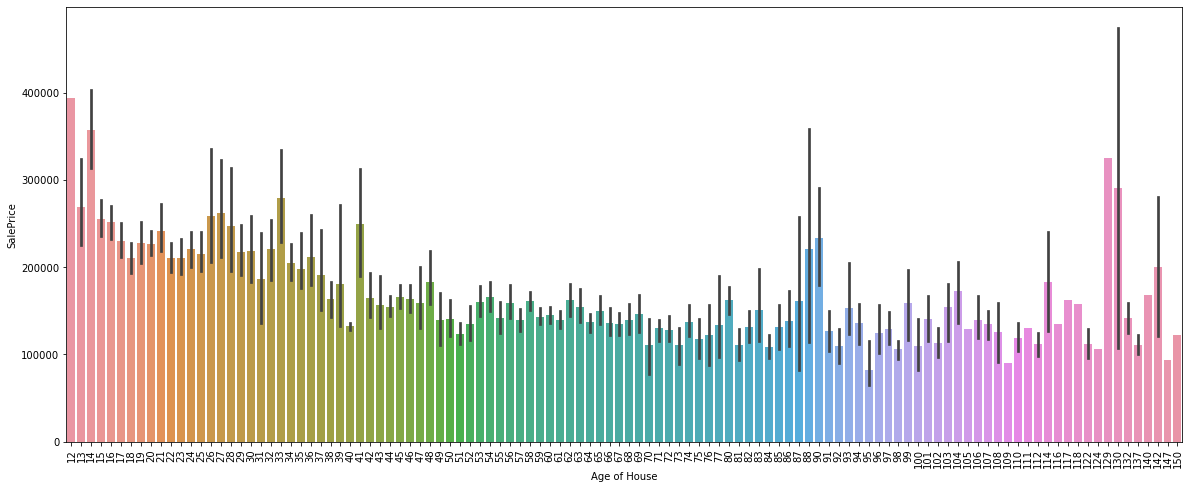

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(x= 'YearBuilt', y = 'SalePrice', data = df, estimator = np.mean)
plt.xlabel('Age of House')
plt.xticks(rotation=90)
plt.show()


As we can see from the above visualization,that houses built less than 12 years ago has the highest selling price in general.But the price increases for 87-90 years old house and also for 129-130 years old house maybe due to antiquity.

### Observing the distribution of the SalesPrice column using distplot function and histplot function.

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


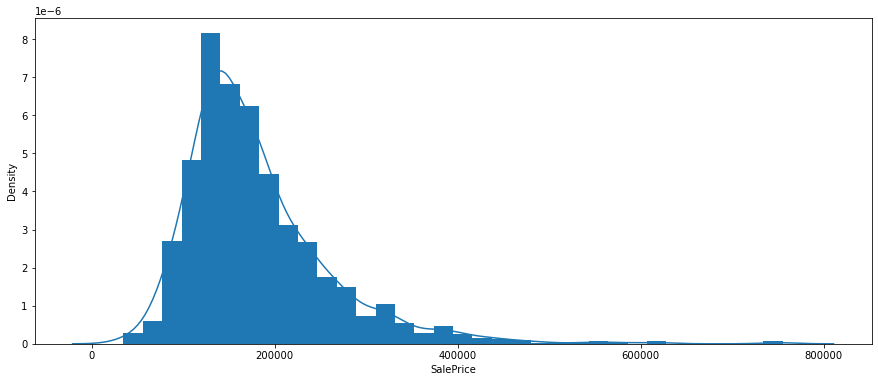

In [57]:
plt.figure(figsize=(15,6))
sns.distplot(df.SalePrice,bins=34,hist_kws={'alpha':1})
plt.show()

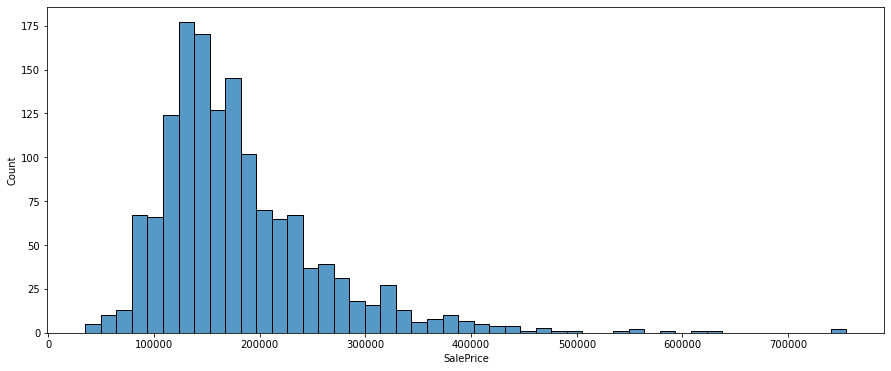

In [58]:
plt.figure(figsize=(15,6))
sns.histplot(df.SalePrice)
plt.show()

From the above plots we can clearly see that the price range between 10000-20000 have the highest density.

In [59]:
## Data Preparation
# Identifying categorical columns and storing it into a new dataframe

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [60]:
# Creating dummy variables
df_dummy = pd.get_dummies(df_categorical, drop_first=True)
df_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
#Create a final dataframe without the original categorical columns
df_final = df.drop(list(df_categorical.columns), axis=1)

In [62]:
#Add the dummy dataframe to the final dataframe
df_final = pd.concat([df_final, df_dummy], axis=1)

In [63]:
df_final.shape

(1447, 267)

# Model Building

In [64]:
# Creating Train and Test Split
df_train, df_test = train_test_split(df_final, train_size=0.7, test_size=0.3, random_state=50)

In [65]:
# Splitting the data on the basis of dependant and independant variables
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [66]:
# Let us now use RFE to find the optimal features
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 100) #with 100 features
rfe.fit(X_train,y_train)

C:\Users\Arkaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=100)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 158),
 ('LotArea', False, 159),
 ('YearBuilt', False, 133),
 ('YearRemodAdd', False, 156),
 ('MasVnrArea', False, 151),
 ('BsmtFinSF1', False, 146),
 ('BsmtFinSF2', False, 145),
 ('BsmtUnfSF', False, 148),
 ('TotalBsmtSF', False, 147),
 ('1stFlrSF', False, 137),
 ('2ndFlrSF', False, 138),
 ('LowQualFinSF', False, 136),
 ('GrLivArea', False, 134),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 42),
 ('FullBath', True, 1),
 ('HalfBath', False, 26),
 ('BedroomAbvGr', False, 113),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 143),
 ('WoodDeckSF', False, 154),
 ('OpenPorchSF', False, 153),
 ('EnclosedPorch', False, 141),
 ('3SsnPorch', False, 150),
 ('ScreenPorch', False, 140),
 ('PoolArea', False, 144),
 ('MiscVal', False, 157),
 ('MoSold', False, 122),
 ('YrSold', False, 149),
 ('MSSubClass_30', False, 118),
 ('MSSubClass_40', False, 100),
 ('MSSubClass_45', True, 1),
 ('MSS

In [68]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [69]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [70]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [71]:
#Applying K-Fold Cross validation and building a Lasso Regression model
folds = KFold(n_splits=10, shuffle=True, random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0, 20.0]}

model = Lasso(normalize=True, tol=1e+500)

model_cv_lasso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv_lasso.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(normalize=True, tol=inf),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
cv_result_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_lasso.transpose()

,0,1,2,3,4,5,6
mean_fit_time,0.004986,0.004288,0.004787,0.004791,0.004688,0.004591,0.00389
std_fit_time,0.000631,0.000898,0.000978,0.000978,0.000638,0.000916,0.000829
mean_score_time,0.002692,0.002096,0.002095,0.002294,0.002194,0.002293,0.001981
std_score_time,0.000639,0.000536,0.000698,0.000639,0.000599,0.000457,0.000446
param_alpha,0.001,0.01,0.1,1.0,5.0,10.0,20.0
params,{'alpha': 0.001},{'alpha': 0.01},{'alpha': 0.1},{'alpha': 1.0},{'alpha': 5.0},{'alpha': 10.0},{'alpha': 20.0}
split0_test_score,0.743104,0.743109,0.743163,0.743704,0.745975,0.74787,0.748485
split1_test_score,0.692135,0.692134,0.692127,0.692113,0.69198,0.691508,0.690056
split2_test_score,0.578659,0.578671,0.578792,0.580038,0.585935,0.592111,0.603946
split3_test_score,0.741499,0.74151,0.741621,0.742723,0.747897,0.753553,0.762115


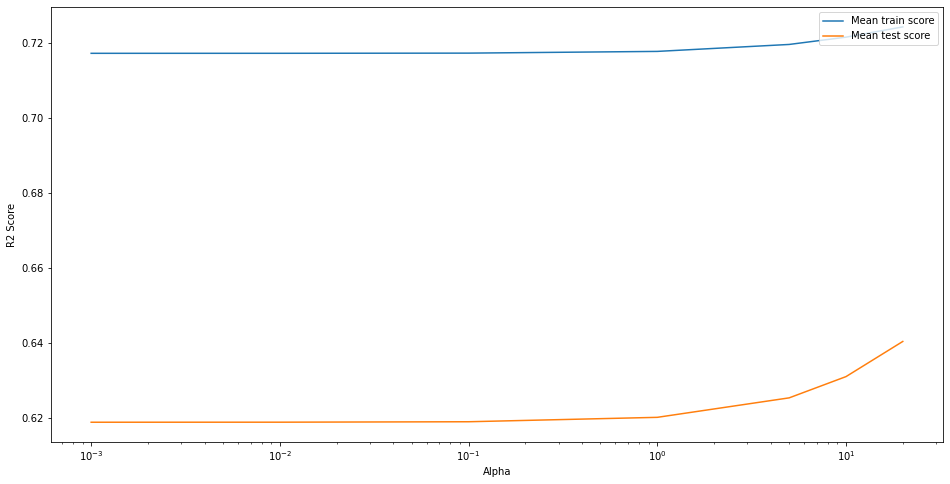

In [73]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['Mean train score', 'Mean test score'], loc='upper right')
plt.show()

In [74]:
# The best value of the hyperparameter for the above model
model_cv_lasso.best_params_

{'alpha': 20.0}

In [75]:
#Building a Lasso Regression Model with alpha = 0.001

lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train,y_train)

y_train_pred = lm_lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred  = lm_lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8919957147322117
0.8364041290349165


C:\Users\Arkaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172333519118.80698, tolerance: 595243190.0104446
  model = cd_fast.enet_coordinate_descent(


In [76]:
model_param = list(lm_lasso.coef_)
cols = df_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient Value']

In [77]:
lasso_coef.sort_values(by='Coefficient Value',ascending=False).head(20)

,Feature,Coefficient Value
39,MSSubClass_80,141302.154186
54,LandContour_HLS,105735.855119
38,MSSubClass_75,97336.196549
51,LotShape_IR2,61033.471681
8,TotalBsmtSF,60271.379943
30,MoSold,57000.048863
55,LandContour_Low,56811.010686
67,Neighborhood_ClearCr,53450.450971
9,1stFlrSF,52890.252925
98,Condition2_PosA,51597.650169


Also to list out the top 5 features based on our analysis which would help us make the best decisions are - 

1.MSSubclass :Identifies the type of dwelling involved in the sale.

2.LandContour: Flatness of the property.

3.LotShape: General shape of property.

4.TotalBsmtSF:Total square feet of basement area.

5.MoSold: Month Sold (MM)

In [78]:
#Exporting output as .csv file
import os  
os.makedirs(r'C:\Users\Arkaj\OneDrive\Documents\House Price USA', exist_ok=True)  
lasso_coef.to_csv(r'C:\Users\Arkaj\OneDrive\Documents\House Price USA\out.csv') 


# Conclusion:

So from the above project we can conclude that all the factors affect the price of house in different ways.
I used different visualization techniques that clearly showed the relation  between the factors and sales price where we came to many significant discoveries.Lastly, I used a Lasso regression model to predict the importance of each factors based on their value of coefficient.